1. How do you approach this problem? What is your high-level solution?

    I will start off by identifying my independent and depedent variables. Then I will focus on identifying coeraltions and any abnormalities. 


2. How do you create a target variable given historical data? Please create a target
variable to be used for the Machine Learning algorithm?

    Target variable will be the dependent variable y. It depends on the problem we are solving and we can use coerlations to find the target variable.



3. What are the possible features that can be extracted to predict issuance? Create one
feature that you think would be highly correlated to Target from the previous step?

    current_amount_outstanding has the most impact on amount


4. What would be the best metric to evaluate your solution? Why?
     
     MSE is best for this problem, as it is normally distributed and it is better to prnalize outliers more in comparism to MAE.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
df = pd.read_csv("documents/overbond_interview/APPL.csv")

In [2]:
#Dropping column as all rows are null
df.isnull().sum()
df.drop(['commission_percent'], axis=1, inplace=True)

,Unnamed: 0,security_id,amount,issue_yield,current_amount_outstanding,coupon_rate,sector,organization_id
Unnamed: 0,1.000000,-0.311976,-0.106420,-0.048672,-0.102162,0.029352,NaN,NaN
security_id,-0.311976,1.000000,0.431624,0.022448,0.432099,-0.138243,NaN,NaN
amount,-0.106420,0.431624,1.000000,-0.307005,0.999799,-0.255075,NaN,NaN
issue_yield,-0.048672,0.022448,-0.307005,1.000000,-0.303292,0.991633,NaN,NaN
current_amount_outstanding,-0.102162,0.432099,0.999799,-0.303292,1.000000,-0.249502,NaN,NaN
coupon_rate,0.029352,-0.138243,-0.255075,0.991633,-0.249502,1.000000,NaN,NaN
sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
organization_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


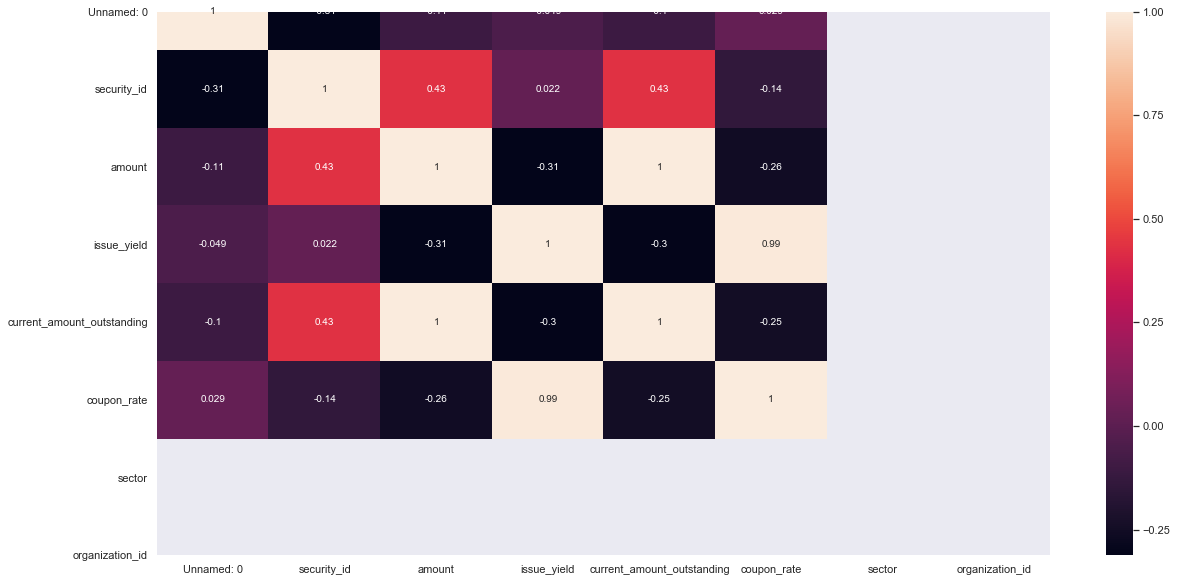

In [3]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,annot=True)
c

In [4]:
#Out of the following categorical colums, I will create dummy variables for currency and coupon_class as they are only ones to have more than one unique value
df['currency'].unique()
df['sector_name'].unique()
df['organization_id'].unique()
df['coupon_class'].unique()


array(['FIX', 'FLT'], dtype=object)

In [5]:
#I will not be creataing dummy variables for security_id and cusip as it will create too many columns
df['security_id'].unique()
df['cusip'].unique()

array([nan, '037833AG5', '037833AJ9', '037833BZ2', '037833CB4',
       '037833CD0', '037833CC2', '037833CT5', '037833CQ1', '037833CU2',
       '037833CY4', '037833DK3', '037833DE7', '037833DH0', '037833DJ6',
       '037833AK6', '037833AL4', '037833AP5', '037833AS9', '037833AR1',
       '037833AT7', '037833AQ3', '037833BA7', '037833AW0', '037833AZ3',
       '037833AY6', '037833BD1', '037833BF6', '037833BR0', '037833BT6',
       '037833BE9', '037833BM1', '037833BY5', '037833BS8', '037833BK5',
       '037833BQ2', '037833BX7', '037833BW9', '037833BU3', '037833BG4',
       '037833BH2', '037833AV2', '037833BL3', '037833CP3', '037833CA6',
       '037833CM0', '037833CJ7', '037833CH1', '037833CE8', '037833CK4',
       '037833CG3', '037833BN9', '037833CX6', '037833AX8', '037833CR9',
       '037833CS7', '037833CL2', '037833CF5', '037833CN8', '037833DC1',
       '037833DB3', '037833DD9', '037833CZ1', '037833AU4', '037833DG2',
       '037833DF4', '037833CV0', '037833CW8'], dtype=object)

In [6]:
#We can notice multicollinearity between our two independent variables issue_yield and coupon_rate. 
#This can affect our final resulkt and therefore needs to be removed
# As coupon rate has better coeraltion with our dependent variable, I will be removing issue_yield 
df.drop(['issue_yield'], axis=1, inplace=True)


In [7]:
#Added dummy variables
df = pd.get_dummies(df, columns=['coupon_class', 'currency'])
df = df.loc[:,['amount', 'current_amount_outstanding','coupon_rate','coupon_class_FIX', 'coupon_class_FLT', 'currency_CAD', 'currency_CHF',
       'currency_EUR', 'currency_GBP', 'currency_JPY', 'currency_USD']]

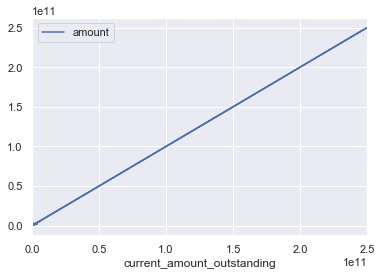

In [8]:
#We can see that it is a linear relation

df.plot(x='current_amount_outstanding', y='amount')


In [9]:
#I have decided to use the linear regression model as we are dealing with continuous variable, and the relationship between dependent and independent variables are linear


In [10]:
#Identifying any abnormality in our data
#it does not appear to have any outliers as the difference between 75% and max is not too high
#However to be more certain we can use box plota nd z score 
df.describe()

,amount,current_amount_outstanding,coupon_rate,coupon_class_FIX,coupon_class_FLT,currency_CAD,currency_CHF,currency_EUR,currency_GBP,currency_JPY,currency_USD
count,7.300000e+01,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,4.810644e+09,4.769548e+09,2.552392,0.835616,0.164384,0.013699,0.027397,0.082192,0.027397,0.013699,0.835616
std,2.910842e+10,2.911527e+10,1.008660,0.373188,0.373188,0.117041,0.164368,0.276557,0.164368,0.117041,0.373188
min,3.500000e+08,0.000000e+00,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+09,1.000000e+09,1.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.250000e+09,1.250000e+09,2.513000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000e+09,1.750000e+09,3.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.500000e+11,2.500000e+11,4.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X = df.loc[:, df.columns != 'amount']
y = df.loc[:, df.columns == 'amount']

In [12]:
#Using 70-30 for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
           y, test_size=0.30, 
            random_state=101)

In [13]:
X_train.head()


,current_amount_outstanding,coupon_rate,coupon_class_FIX,coupon_class_FLT,currency_CAD,currency_CHF,currency_EUR,currency_GBP,currency_JPY,currency_USD
33,5.000000e+08,3.13025,0,1,0,0,0,0,0,1
56,0.000000e+00,1.30000,1,0,0,0,0,0,0,1
41,4.000000e+09,4.65000,1,0,0,0,0,0,0,1
45,2.000000e+09,4.37500,1,0,0,0,0,0,0,1
15,7.500000e+08,2.40000,1,0,0,0,0,0,0,1


In [14]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
Predictions = lg.predict(X_test)

In [16]:
Predictions

array([[2.19654873e+09],
       [8.94920516e+08],
       [1.72202610e+10],
       [1.41564531e+09],
       [1.36538957e+09],
       [1.89105168e+10],
       [2.65366789e+09],
       [2.74768819e+09],
       [1.43103642e+09],
       [1.79617648e+09],
       [1.53599786e+09],
       [1.05089956e+09],
       [1.53154789e+09],
       [4.29842587e+08],
       [8.83979375e+08],
       [2.43484507e+09],
       [1.49668326e+09],
       [1.75221629e+10],
       [2.09158729e+09],
       [1.23904791e+09],
       [1.38727185e+09],
       [8.51155953e+08]])

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Predictions)

2480054024.353542

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Predictions)

3.782306316484234e+19

In [41]:
from math import sqrt

rms = sqrt(mean_squared_error(y_test, Predictions))
rms

6150045785.589107

In [ ]:
#Therefore the best validation metric is MSE. MSE does not penalize large errors as much as RSME. - MSE is best for this problem, as it is normally distributed and it is better to prnalize outliers more in comparism to MAE.
#Furthermore hyper parametering can be added to imporve accuracy 

In [37]:
df['amount'].mean()

4810643835.616438

In [28]:
weights = lg.coef_
abs_weights = np.abs(weights)

print(abs_weights)

[[7.26197714e-01 2.18822816e+08 9.81081408e+07 9.81081408e+07
  3.45230103e-04 1.73232887e+10 1.70127421e+10 0.00000000e+00
  5.08822352e+10 1.65462045e+10]]


In [29]:
lg.intercept_

array([1.75468161e+10])